# Early disease intervention and simulation of intervention effects

*WQD7003 Group 8*

*Leader: MENG HUIDAN(23104917)*

*Member1: xxx(fill your name)*

*Member2: xxx(fill your name)*

*Member3: xxx(fill your name)*

*Member4: SALVIN A/L RAVINDRAN(17167138)*

## Background
**Current heart disease models are mostly used for risk assessment and lack guidance on intervention effects for users.**

## Plan
**User input of a healthy behavior intervention plan (e.g., reduce BMI by 2, or get an extra hour of sleep per day).**

**The model simulates changes in health status and risk after intervention, helping users understand the importance of lifestyle changes.**

## Accomplish

### Data Cleaning
*Author: SALVIN A/L RAVINDRAN(17167138)*

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = 'heart_2022_with_nans.csv'
df = pd.read_csv(file_path)

# Step 1: Data Understanding and Overview
print("Initial dataset shape:", df.shape)
print("Dataset Overview:")
print(df.info())
print("Statistical Summary:\n", df.describe())
print("Missing values per column:\n", df.isnull().sum())

Initial dataset shape: (445132, 40)
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  44335

In [2]:
# Step 2: Handling Missing Values
# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # Using the mode for categorical
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='median')  # Median imputation for numerical
df[num_cols] = num_imputer.fit_transform(df[num_cols])
print("Step 2 is completed:")
print("Minimum BMI value:", df['BMI'].min())
print("Maximum BMI value:", df['BMI'].max())

Step 2 is completed:
Minimum BMI value: 12.02
Maximum BMI value: 99.64


In [3]:
# Step 3: Handling Outliers
# Apply IQR method for numerical columns
for col in ['BMI', 'WeightInKilograms', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
print("Step 3 is completed:")
print("Minimum BMI value:", df['BMI'].min())
print("Maximum BMI value:", df['BMI'].max())

Step 3 is completed:
Minimum BMI value: 14.509999999999998
Maximum BMI value: 40.910000000000004


In [4]:
# Step 4: Feature Engineering
# Example: Creating BMI categories
df['BMICategory'] = pd.cut(
    df['BMI'], 
    bins=[0, 18.5, 24.9, 29.9, np.inf], 
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

# Dropping irrelevant columns (if any, based on analysis)
# Example: Dropping columns with low variance or no relevance
columns_to_drop = ['State']  # Replace with other irrelevant columns if needed
df = df.drop(columns=columns_to_drop, errors='ignore')
print("Step 4 is completed:")

Step 4 is completed:


In [5]:
# Step 5: Encoding
# Encode only columns with 2 unique values
label_encoders = {}
for col in cat_cols:
    if col in df.columns:  # Check if the column exists in the DataFrame
        if df[col].nunique() == 2:  # Check if the column has exactly 2 unique values
            print(f"Encoding column: {col}")
            label_encoders[col] = LabelEncoder()
            df[col] = label_encoders[col].fit_transform(df[col])
        else:
            print(f"Skipping column: {col}, unique values: {df[col].nunique()}")
    else:
        print(f"Column {col} not found in DataFrame. Skipping.")

print("Step 5 is completed.")

Column State not found in DataFrame. Skipping.
Encoding column: Sex
Skipping column: GeneralHealth, unique values: 5
Skipping column: LastCheckupTime, unique values: 4
Encoding column: PhysicalActivities
Skipping column: RemovedTeeth, unique values: 4
Encoding column: HadHeartAttack
Encoding column: HadAngina
Encoding column: HadStroke
Encoding column: HadAsthma
Encoding column: HadSkinCancer
Encoding column: HadCOPD
Encoding column: HadDepressiveDisorder
Encoding column: HadKidneyDisease
Encoding column: HadArthritis
Skipping column: HadDiabetes, unique values: 4
Encoding column: DeafOrHardOfHearing
Encoding column: BlindOrVisionDifficulty
Encoding column: DifficultyConcentrating
Encoding column: DifficultyWalking
Encoding column: DifficultyDressingBathing
Encoding column: DifficultyErrands
Skipping column: SmokerStatus, unique values: 4
Skipping column: ECigaretteUsage, unique values: 4
Encoding column: ChestScan
Skipping column: RaceEthnicityCategory, unique values: 5
Skipping colum

In [6]:
# Step 6: Removing Duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)
print("Step 6 is completed:")

Shape after removing duplicates: (442135, 40)
Step 6 is completed:


In [7]:
# Step 7: Data Quality Checks

# Ensure no negative values in numerical columns
for col in num_cols:
    if col in df.columns:  # Safeguard: Check if the column exists
        if (df[col] < 0).any():
            print(f"Negative values found in {col}. Correcting...")
            df[col] = df[col].clip(lower=0)

# Validate consistency in categorical data (unique values check)
for col in cat_cols:
    if col in df.columns:  # Safeguard: Check if the column exists
        print(f"Unique values in {col}: {df[col].unique()}")
    else:
        print(f"Column '{col}' has been removed or does not exist. Skipping consistency check.")


Column 'State' has been removed or does not exist. Skipping consistency check.
Unique values in Sex: [0 1]
Unique values in GeneralHealth: ['Very good' 'Excellent' 'Fair' 'Poor' 'Good']
Unique values in LastCheckupTime: ['Within past year (anytime less than 12 months ago)'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)'
 '5 or more years ago']
Unique values in PhysicalActivities: [0 1]
Unique values in RemovedTeeth: ['None of them' '1 to 5' '6 or more, but not all' 'All']
Unique values in HadHeartAttack: [0 1]
Unique values in HadAngina: [0 1]
Unique values in HadStroke: [0 1]
Unique values in HadAsthma: [0 1]
Unique values in HadSkinCancer: [0 1]
Unique values in HadCOPD: [0 1]
Unique values in HadDepressiveDisorder: [0 1]
Unique values in HadKidneyDisease: [0 1]
Unique values in HadArthritis: [0 1]
Unique values in HadDiabetes: ['Yes' 'No' 'No, pre-diabetes or borderline diabetes'
 'Yes, but only during pregnancy (f

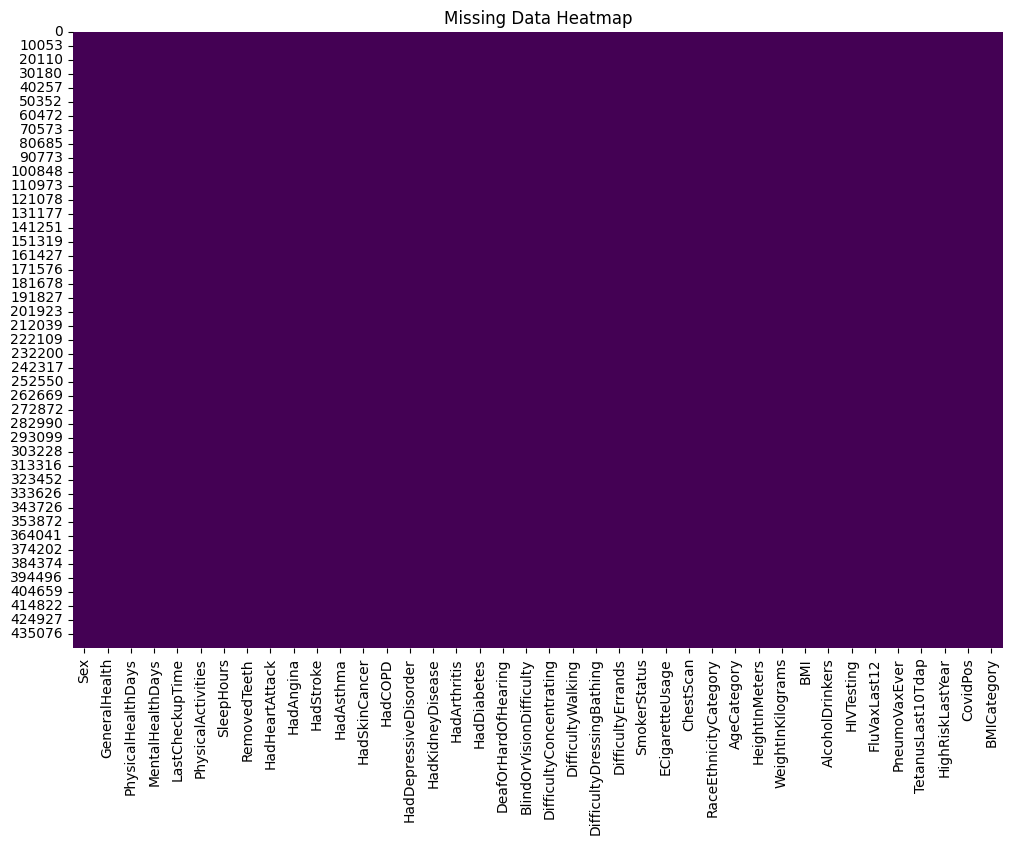

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [9]:
import matplotlib.pyplot as plt

# Count of missing values per column
missing_counts = df.isnull().sum()

# Check if there are missing values
if missing_counts[missing_counts > 0].empty:
    print("No missing values in the dataset.")
else:
    # Bar plot of missing values
    plt.figure(figsize=(12, 6))
    missing_counts[missing_counts > 0].sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title("Count of Missing Values per Column")
    plt.ylabel("Number of Missing Values")
    plt.xlabel("Columns")
    plt.xticks(rotation=45)
    plt.show()


No missing values in the dataset.


In [10]:
#Step 8
# Save the cleaned dataset
cleaned_file_path = 'cleaned_heart_disease_data.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")
print("Step 8 is completed:")

Cleaned dataset saved to cleaned_heart_disease_data.csv
Step 8 is completed:


### EDA Analysis
*Author: xxx(fill your name)*

### Feature Engineering
*Author: xxx(fill your name)*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('cleaned_file.csv')

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# Initialize known binary variables, categorical variables and numerical variables
binary_columns = ["HadStroke","PneumoVaxEver","HadArthritis","HadKidneyDisease","DeafOrHardOfHearing","HadHeartAttack", "HadAngina", "ChestScan","DifficultyWalking","HadDiabetes","HadCOPD"]  # 已知的二元变量
categorical_columns = ["GeneralHealth", "SmokerStatus", "AgeCategory", "RemovedTeeth"]  # Categorical variables
numerical_columns = ["PhysicalHealthDays", "MentalHealthDays", "BMI", "HeightInMeters", "WeightInKilograms"]  # Numeric variables

# Load data
df = pd.DataFrame()

# Numeric variable standardization
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# One-Hot Coding of Categorical Variables
# Assume the possible values of the categorical variable during training (obtained from the data set)
general_health_values = ["Poor", "Fair", "Good", "VeryGood", "Excellent"]
smoker_status_values = ["Current smoker - now smokes every day", "Current smoker - now smokes some days", "Former smoker", "Never smoked"]
age_category_values = ["Age 80 or older", "Age 75 to 79", "Age 70 to 74", "Age 65 to 69", "Age 60 to 64", "Age 55 to 59", "Age 50 to 54", "Age 40 to 44", "Age 35 to 39","Age 30 to 34","Age 25 to 29","Age 18 to 24",]
removed_teeth_values = ["1 to 5", "6 or more, but not all", "None of them", "All"]

# One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_columns)

# Update categorical variable column names
# Get all newly generated column names
new_categorical_columns = [col for col in data.columns if any(cat_col in col for cat_col in categorical_columns)]

# Binary variable processing
def binary_encoder(x):
    return 1 if x == 'Yes' or x == 'Male' else 0

for col in binary_columns:
    data[col] = data[col].apply(binary_encoder)

# Merge all columns that need to be retained
columns_to_keep = binary_columns + new_categorical_columns + numerical_columns
df = data[columns_to_keep]
# Check out the final features
print("Final number of features：", df.shape[1])

Final number of features： 42


### Model training and optimization
*Author: MENG HUIDAN*

**Separate training set, validation set and test set.**

In [6]:
# Separate training set, validation set and test set.
# Randomly partition the data using an 8:1:1 ratio.
from sklearn.model_selection import train_test_split

X = df.drop(['HadHeartAttack'], axis=1)
y = df['HadHeartAttack']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Logistic regression**

In [ ]:
# Finding the Optimal Parameters for LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parameter search range
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1],  
    'solver': ['lbfgs', 'liblinear'],  
    'max_iter': [50, 100]  
}

lr = LogisticRegression()

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Optimal parameters: ", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [5]:
# logistic regression
from sklearn.linear_model import LogisticRegression

# Using an algorithm that penalizes imbalance In logistic regression, adjust class_weight="balanced" so that the model gives a higher weight to class 1.
# Define model
best_params = {'penalty': 'l2', 'C': 0.01, 'solver': 'liblinear', 'max_iter': 100}
lr_model = LogisticRegression(**best_params, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=42, solver='liblinear')

**Random forest**

In [6]:
# Finding the Optimal Parameters for Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameter search range
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10]   
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter optimization using GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train, y_train)

# Output the best parameters and scores
print("Best parameters found: ", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [7]:
# random forest
from sklearn.ensemble import RandomForestClassifier
best_params = {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10}
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42)

**XGBoost**

In [ ]:
# Finding the Optimal Parameters for XGBoost
from sklearn.model_selection import train_test_split, GridSearchCV
# 
param_grid = {
    "max_depth": [3, 9],
    "learning_rate": [0.1, 0.2],
    "n_estimators": [100, 500],
    "subsample": [0.6, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [1, 5]  # 用于不平衡数据
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, random_state=42, eval_metric="logloss"),
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Print the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

In [7]:
# XGBoost is one of the implementations of gradient boosting trees and is suitable for complex nonlinear relationships between features.
from xgboost import XGBClassifier

# XGBoost model
best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.6}
xgb_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False)
xgb_model.fit(X_train, y_train)

[21:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

**LightGBM**

In [12]:
# Finding the Optimal Parameters for LightGBM
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

X_train.columns = X_train.columns.str.replace(r"[^\w]", "_", regex=True)
X_val.columns = X_val.columns.str.replace(r"[^\w]", "_", regex=True)

param_grid = {
    'n_estimators': [100, 200],          
    'max_depth': [6, 10],                 
    'learning_rate': [0.01, 0.1, 0.2],        
    'num_leaves': [50, 70],               
    'min_child_samples': [20, 50, 100],       
    'subsample': [0.8, 1.0],                  
    'colsample_bytree': [0.8, 1.0]           
}

lgb_model = lgb.LGBMClassifier(random_state=42)

grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Print the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[LightGBM] [Info] Number of positive: 19878, number of negative: 324060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 343938, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.057795 -> initscore=-2.791315
[LightGBM] [Info] Start training from score -2.791315
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 50, 'n_estimators': 100, 'num_leaves': 70, 'subsample': 0.8}
Best CV Score: 0.9453273546467106


In [13]:
# LightGBM is another efficient implementation of gradient boosted trees suitable for large-scale data.
import lightgbm as lgb
X_train.columns = X_train.columns.str.replace(r"[^\w]", "_", regex=True)  # Replace non-alphanumeric characters with underscores
X_val.columns = X_val.columns.str.replace(r"[^\w]", "_", regex=True)

# Defining the LightGBM model
best_params = {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'num_leaves': 70, 'min_child_samples': 50, 'subsample': 0.8, 'colsample_bytree':0.8}
lgb_model = lgb.LGBMClassifier(**best_params, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 19878, number of negative: 324060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 343938, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.057795 -> initscore=-2.791315
[LightGBM] [Info] Start training from score -2.791315


LGBMClassifier(colsample_bytree=0.8, max_depth=10, min_child_samples=50,
               num_leaves=70, random_state=42, subsample=0.8)

### Model Evaluation
*Author: XIAO WANJUN*

In [14]:
from sklearn.metrics import classification_report, roc_auc_score  

# Logistic regression model evaluation 
# Get the probability of the positive class
y_pred_lr = lr_model.predict(X_val)   
print("Logistic Regression Classification Report:\n")  
print(classification_report(y_val, y_pred_lr))  
print("Logistic Regression AUC:", roc_auc_score(y_val, lr_model.predict_proba(X_val)[:, 1]))  

# Random Forest Model Evaluation
y_pred_rf = rf_model.predict(X_val) 
print()
print("\nRandom Forest Classification Report:\n")  
print(classification_report(y_val, y_pred_rf))  
# Calculate AUC
print("Random Forest AUC:", roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1]))

# XGBoost Model Evaluation
y_pred_xgb = xgb_model.predict(X_val)  
print()
print("XGBoost Classification Report:\n")  
print(classification_report(y_val, y_pred_xgb))  
print("XGBoost AUC:", roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1]))  

# LightGBM model evaluation 
y_pred_lgb = lgb_model.predict(X_val) 
print()
print("\nLightGBM Classification Report:\n")  
print(classification_report(y_val, y_pred_lgb))  
print("LightGBM AUC:", roc_auc_score(y_val, lgb_model.predict_proba(X_val)[:, 1]))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40550
           1       0.55      0.21      0.30      2442

    accuracy                           0.95     42992
   macro avg       0.75      0.60      0.64     42992
weighted avg       0.93      0.95      0.93     42992

Logistic Regression AUC: 0.879262954805495


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40550
           1       0.58      0.15      0.24      2442

    accuracy                           0.95     42992
   macro avg       0.76      0.57      0.61     42992
weighted avg       0.93      0.95      0.93     42992

Random Forest AUC: 0.8766606024250907

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40550
           1       0.55      0.21      

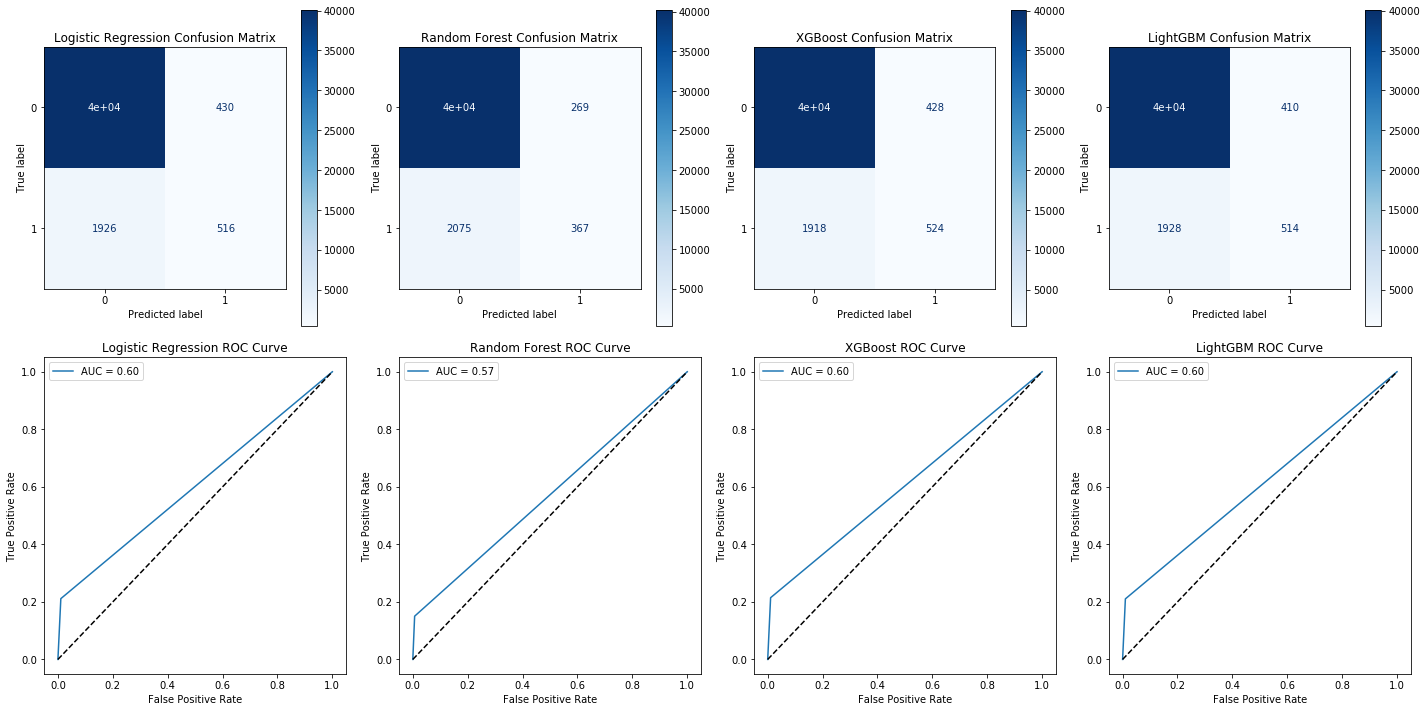

In [15]:
# Confusion matrix and ROC curve visualization
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score  

# y_val The true labels of the validation set
# Prediction results
y_pred_lr = lr_model.predict(X_val)  
y_pred_rf = rf_model.predict(X_val)  
y_pred_xgb = xgb_model.predict(X_val)  
y_pred_lgb = lgb_model.predict(X_val)  

# Compute confusion matrix and AUC 
models = {  
    "Logistic Regression": y_pred_lr,  
    "Random Forest": y_pred_rf,  
    "XGBoost": y_pred_xgb,  
    "LightGBM": y_pred_lgb  
}  

# Create a graph 
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  

# Confusion Matrix Visualization
for i, (model_name, y_pred) in enumerate(models.items()):  
    cm = confusion_matrix(y_val, y_pred)  
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  
    disp.plot(ax=axes[0, i], cmap=plt.cm.Blues)  
    axes[0, i].set_title(f"{model_name} Confusion Matrix")  

# ROC Curve Visualization 
for i, (model_name, y_pred) in enumerate(models.items()):  
    fpr, tpr, _ = roc_curve(y_val, y_pred)  
    auc = roc_auc_score(y_val, y_pred)  
    axes[1, i].plot(fpr, tpr, label=f'AUC = {auc:.2f}')  
    axes[1, i].plot([0, 1], [0, 1], 'k--')  
    axes[1, i].set_xlabel('False Positive Rate')  
    axes[1, i].set_ylabel('True Positive Rate')  
    axes[1, i].set_title(f"{model_name} ROC Curve")  
    axes[1, i].legend()  

plt.tight_layout()  
plt.show()

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE  

smote = SMOTE()  
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score  

scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5)  
print("Cross-validation scores:", scores)  
print("Mean CV score:", scores.mean())

### Risk prediction and interventions
*Author：MENG HUIDAN*

In [8]:
import joblib
feature_columns = X_train.columns.tolist()

joblib.dump(xgb_model, "xgb_42features_model.pkl")  # 保存为 .pkl 文件
print("The model has been saved as xgb_42features_model.pkl")
joblib.dump(feature_columns, "xgb_42features_columns.pkl")

The model has been saved as xgb_42features_model.pkl


['xgb_42features_columns.pkl']

**Risk prediction**

In [9]:
# Load model
model_res = joblib.load("xgb_42features_model.pkl")
feature_columns = joblib.load("xgb_42features_columns.pkl")

# Load user input sample data (please obtain user input according to the actual situation)
user_input = {
    "PhysicalHealthDays":5,
    "MentalHealthDays": 10,
    "BMI": 23,
    "HeightInMeters": 1.55,
    "WeightInKilograms": 70.68,
    "GeneralHealth": "Poor",       
    "SmokerStatus": "Yes",         
    "AgeCategory": "Age 30 to 34",   
    "RemovedTeeth": "None of them",   
    "HadStroke": "Yes", 
    "PneumoVaxEver": "No", 
    "HadArthritis": "No", 
    "HadKidneyDisease": "Yes", 
    "DeafOrHardOfHearing": "Yes", 
    "HadHeartAttack": "No", 
    "HadAngina": "Yes", 
    "ChestScan": "No", 
    "DifficultyWalking": "Yes", 
    "HadDiabetes": "Yes", 
    "HadCOPD": "Yes"
}
# Data preprocessing function
def preprocess_input(user_input):
    user_input_scaled = scaler.fit_transform([[user_input[col] for col in numerical_columns]])[0]
    numerical_input = dict(zip(numerical_columns, user_input_scaled))

    one_hot_encoded_input = {}
    for value in general_health_values:
        one_hot_encoded_input[f"GeneralHealth_{value}"] = 1 if user_input["GeneralHealth"] == value else 0
    for value in smoker_status_values:
        one_hot_encoded_input[f"SmokerStatus_{value}"] = 1 if user_input["SmokerStatus"] == value else 0
    for value in age_category_values:
        one_hot_encoded_input[f"AgeCategory_{value}"] = 1 if user_input["AgeCategory"] == value else 0
    for value in removed_teeth_values:
        one_hot_encoded_input[f"RemovedTeeth_{value}"] = 1 if user_input["RemovedTeeth"] == value else 0

    def binary_encoder(value):
        return 1 if value == "Yes" else 0

    binary_encoded_input = {col: binary_encoder(user_input[col]) for col in binary_columns}

    all_features = {**numerical_input, **one_hot_encoded_input, **binary_encoded_input}
    input_features = [all_features[col] if col in all_features else 0 for col in feature_columns]
    return np.array(input_features).reshape(1, -1)

# Convert to model input format (make sure the column order is consistent with training)
input_features = input_features = preprocess_input(user_input)

# Convert to NumPy array and predict
input_features = np.array(input_features).reshape(1, -1)
risk_probability = model_res.predict_proba(input_features)[:, 1][0]  # Probability of getting sick
risk_class = model_res.predict(input_features)[0]  # Classification results

# Output prediction results
print("heart disease risk probability:", round(risk_probability * 100, 2), "%")
print("Prediction category:", "high risk" if risk_class == 1 else "low risk")

heart disease risk probability: 66.59 %
Prediction category: high risk


**Interventions**

In [11]:
# prediction function
def predict_risk(user_input):
    input_features = preprocess_input(user_input)
    risk_probability = xgb_model.predict_proba(input_features)[:, 1][0]  
    risk_class = xgb_model.predict(input_features)[0]  
    return round(risk_probability * 100, 2), "high risk" if risk_class == 1 else "low risk"
# Intervention simulation
interventions = {
    "Quit smoking": lambda input_data: {**input_data, "SmokerStatus": "No"},
    "Lose weight": lambda input_data: {**input_data, "BMI": max(18.5, input_data["BMI"] - 5)},
    "Improve mental health": lambda input_data: {**input_data, "MentalHealthDays": max(0, input_data["MentalHealthDays"] - 5)},
    "Reduce physical health problems": lambda input_data: {**input_data, "PhysicalHealthDays": max(0, input_data["PhysicalHealthDays"] - 5)},
    "Increase physical activity": lambda input_data: {**input_data, "DifficultyWalking": "No"},
    "Improve general health": lambda input_data: {**input_data, "GeneralHealth": "Excellent"},
    "Improve diet and oral health": lambda input_data: {**input_data, "RemovedTeeth": "None of them"},
    "Manage diabetes effectively": lambda input_data: {**input_data, "HadDiabetes": "No"},
    "Reduce heart-related risk factors": lambda input_data: {
        **input_data,
        "HadStroke": "No",
        "HadHeartAttack": "No",
        "HadAngina": "No",
        "ChestScan": "No",
    },
    "Improve respiratory health": lambda input_data: {**input_data, "HadCOPD": "No"},
    "Enhance kidney health": lambda input_data: {**input_data, "HadKidneyDisease": "No"},
    "Address arthritis issues": lambda input_data: {**input_data, "HadArthritis": "No"},
    "Assist hearing health": lambda input_data: {**input_data, "DeafOrHardOfHearing": "No"},
    "Encourage vaccination": lambda input_data: {**input_data, "PneumoVaxEver": "Yes"},
    "Encourage regular health check-ups": lambda input_data: {**input_data, "ChestScan": "No"},
}


# initial risks
initial_probability, initial_class = predict_risk(user_input)
print("Initial heart disease risk probability:", initial_probability, "%")
print("Initial prediction category:", initial_class)

# Apply interventions and predict effects
for name, intervention in interventions.items():
    modified_input = intervention(user_input)
    new_probability, new_class = predict_risk(modified_input)
    print(f"\nInterventions: {name}")
    print("Probability of heart disease risk after intervention:", new_probability, "%")
    print(":", new_class)

Initial heart disease risk probability: 66.59 %
Initial prediction category: high risk

Interventions: Quit smoking
Probability of heart disease risk after intervention: 66.59 %
: high risk

Interventions: Lose weight
Probability of heart disease risk after intervention: 66.59 %
: high risk

Interventions: Improve mental health
Probability of heart disease risk after intervention: 66.59 %
: high risk

Interventions: Reduce physical health problems
Probability of heart disease risk after intervention: 66.59 %
: high risk

Interventions: Increase physical activity
Probability of heart disease risk after intervention: 68.64 %
: high risk

Interventions: Improve general health
Probability of heart disease risk after intervention: 50.39 %
: high risk

Interventions: Improve diet and oral health
Probability of heart disease risk after intervention: 66.59 %
: high risk

Interventions: Manage diabetes effectively
Probability of heart disease risk after intervention: 55.51 %
: high risk

Interv

### Deployment
*Author: *

In [ ]:
#add-scaler.pkl
import joblib
joblib.dump(scaler, "scaler.pkl")

In [ ]:
!pip install streamlit -q

In [ ]:
#app.py
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.preprocessing import StandardScaler

# Configure Streamlit page
st.set_page_config(
    page_title="Heart Disease Risk Prediction",
    page_icon="❤️",
    layout="wide"
)

# Add error handling for model loading
@st.cache_resource
def load_model_files():
    try:
        model_path = "logistic_regression_model.pkl"
        features_path = "feature_columns.pkl"
        scaler_path = "scaler.pkl"

        if not all(os.path.exists(path) for path in [model_path, features_path, scaler_path]):
            raise FileNotFoundError("One or more model files are missing")

        lr_model = joblib.load(model_path)
        feature_columns = joblib.load(features_path)
        scaler = joblib.load(scaler_path)
        return lr_model, feature_columns, scaler
    except Exception as e:
        st.error(f"Error loading model files: {str(e)}")
        return None, None, None

# Load the models
lr_model, feature_columns, scaler = load_model_files()

# Define constants with reordered age categories
CATEGORICAL_MAPPINGS = {
    "GeneralHealth": ["Poor", "Fair", "Good", "VeryGood", "Excellent"],
    "SmokerStatus": ["Current smoker - now smokes every day", "Current smoker - now smokes some days",
                     "Former smoker", "Never smoked"],
    "AgeCategory": ["Age 18 to 24", "Age 25 to 29", "Age 30 to 34", "Age 35 to 39",
                    "Age 40 to 44", "Age 50 to 54", "Age 55 to 59", "Age 60 to 64",
                    "Age 65 to 69", "Age 70 to 74", "Age 75 to 79", "Age 80 or older"],
    "RemovedTeeth": ["None of them", "1 to 5", "6 or more, but not all", "All"]
}

BINARY_COLUMNS = [
    "HadStroke", "PneumoVaxEver", "HadArthritis", "HadKidneyDisease",
    "DeafOrHardOfHearing", "HadAngina", "ChestScan",
    "DifficultyWalking", "HadDiabetes", "HadCOPD"
]

NUMERICAL_COLUMNS = [
    "PhysicalHealthDays", "MentalHealthDays", "BMI",
    "HeightInMeters", "WeightInKilograms"
]

# Previous preprocessing functions remain the same
def preprocess_input(user_input, feature_columns, scaler):
    try:
        input_df = pd.DataFrame([user_input])
        numerical_data = input_df[NUMERICAL_COLUMNS]
        scaled_numerical = scaler.transform(numerical_data)
        processed_data = pd.DataFrame(0, index=[0], columns=feature_columns)

        for idx, col in enumerate(NUMERICAL_COLUMNS):
            processed_data[col] = scaled_numerical[0][idx]

        for category, values in CATEGORICAL_MAPPINGS.items():
            selected_value = user_input[category]
            for value in values:
                col_name = f"{category}_{value}"
                if col_name in feature_columns:
                    processed_data[col_name] = 1 if selected_value == value else 0

        for col in BINARY_COLUMNS:
            if col in feature_columns:
                processed_data[col] = 1 if user_input[col] == "Yes" else 0

        return processed_data
    except Exception as e:
        st.error(f"Error in preprocessing: {str(e)}")
        return None

def calculate_risk(input_data):
    processed_input = preprocess_input(input_data, feature_columns, scaler)
    if processed_input is not None:
        risk_probability = lr_model.predict_proba(processed_input)[:, 1][0]
        risk_class = lr_model.predict(processed_input)[0]
        return risk_probability, risk_class
    return None, None

def display_risk_results(risk_probability, risk_class):
    res_col1, res_col2 = st.columns(2)

    res_col1.metric(
        label="Risk Probability",
        value=f"{risk_probability * 100:.1f}%"
    )

    risk_status = "High Risk" if risk_class == 1 else "Low Risk"
    res_col2.metric(
        label="Risk Category",
        value=risk_status,
        delta="Seek medical advice" if risk_class == 1 else "Monitor health"
    )

    if risk_probability < 0.3:
        st.success("Low risk level detected. Continue maintaining healthy habits.")
    elif risk_probability < 0.7:
        st.warning("Moderate risk level detected. Consider consulting a healthcare provider.")
    else:
        st.error("High risk level detected. Please consult a healthcare provider soon.")

def main():
    st.title("❤️ Heart Disease Risk Prediction")
    st.write("Enter patient information to predict heart disease risk")

    if any(x is None for x in [lr_model, feature_columns, scaler]):
        st.error("Error: Model files could not be loaded. Please check if all required files are present.")
        return

    tab1, tab2 = st.tabs(["Risk Prediction", "Intervention Simulation"])

    with tab1:
        col1, col2 = st.columns(2)

        with col1:
            st.subheader("Health Metrics")
            user_input = {}

            user_input["PhysicalHealthDays"] = st.slider(
                "Physical Health Days (Days not feeling well)",
                min_value=0, max_value=30, value=5,
                help="Number of days physical health was not good in the past 30 days"
            )
            user_input["MentalHealthDays"] = st.slider(
                "Mental Health Days (Days not feeling well)",
                min_value=0, max_value=30, value=5,
                help="Number of days mental health was not good in the past 30 days"
            )

            height = st.number_input("Height (meters)", min_value=1.0, max_value=2.5, value=1.70)
            weight = st.number_input("Weight (kg)", min_value=30.0, max_value=200.0, value=70.0)
            bmi = weight / (height ** 2)
            st.info(f"Calculated BMI: {bmi:.1f}")

            user_input["HeightInMeters"] = height
            user_input["WeightInKilograms"] = weight
            user_input["BMI"] = bmi

        with col2:
            st.subheader("Health Conditions")
            for category, values in CATEGORICAL_MAPPINGS.items():
                user_input[category] = st.selectbox(
                    category.replace("Category", "").replace("Status", ""),
                    values,
                    key=f"pred_{category}"
                )

            for col in BINARY_COLUMNS:
                display_name = col.replace("Had", "Has ").replace("Or", " or ")
                user_input[col] = st.selectbox(
                    display_name,
                    ["No", "Yes"],
                    key=f"pred_{col}"
                )

        if st.button("Predict Risk", type="primary", key="predict_button"):
            with st.spinner("Calculating risk..."):
                risk_probability, risk_class = calculate_risk(user_input)
                if risk_probability is not None:
                    st.header("Prediction Results")
                    display_risk_results(risk_probability, risk_class)
                    st.session_state['baseline_risk'] = risk_probability
                    st.session_state['user_input'] = user_input.copy()

    with tab2:
        st.subheader("Intervention Simulation")
        st.write("Explore how lifestyle changes might affect your heart disease risk")

        if 'baseline_risk' not in st.session_state:
            st.warning("Please complete a risk prediction first before simulating interventions.")
            return

        modified_input = st.session_state['user_input'].copy()

        # Create three columns for more organized intervention options
        sim_col1, sim_col2, sim_col3 = st.columns(3)

        with sim_col1:
            st.markdown("#### Physical Health Improvements")

            # BMI and weight management
            target_bmi = st.slider(
                "Target BMI",
                min_value=18.5,
                max_value=35.0,
                value=float(modified_input["BMI"]),
                step=0.5,
                help="Healthy BMI range is 18.5-24.9",
                key="sim_bmi"
            )
            modified_input["BMI"] = target_bmi

            # Physical health days improvement
            st.info("Physical Health Days: Days NOT feeling well")
            modified_input["PhysicalHealthDays"] = st.slider(
                "Target Physical Health Days",
                min_value=0,
                max_value=30,
                value=min(modified_input["PhysicalHealthDays"], 10),
                help="Reduce days of physical health issues",
                key="sim_physical"
            )

        with sim_col2:
            st.markdown("#### Mental & Behavioral Health")

            # Mental health improvements
            st.info("Mental Health Days: Days NOT feeling well")
            modified_input["MentalHealthDays"] = st.slider(
                "Target Mental Health Days",
                min_value=0,
                max_value=30,
                value=min(modified_input["MentalHealthDays"], 10),
                help="Reduce days of mental health issues",
                key="sim_mental"
            )

            # Smoking cessation
            if modified_input["SmokerStatus"] in ["Current smoker - now smokes every day", "Current smoker - now smokes some days"]:
                quit_smoking = st.selectbox(
                    "Smoking Cessation Plan",
                    ["Current smoker - now smokes some days", "Former smoker", "Never smoked"],
                    help="Progressive steps to quit smoking",
                    key="sim_smoking"
                )
                modified_input["SmokerStatus"] = quit_smoking

        with sim_col3:
            st.markdown("#### Chronic Condition Management")

            # General health improvement
            current_health_index = CATEGORICAL_MAPPINGS["GeneralHealth"].index(modified_input["GeneralHealth"])
            target_health_options = CATEGORICAL_MAPPINGS["GeneralHealth"][current_health_index:]
            target_health = st.selectbox(
                "Target General Health",
                target_health_options,
                help="Set a goal for overall health improvement",
                key="sim_health"
            )
            modified_input["GeneralHealth"] = target_health

            # Chronic condition management
            st.markdown("##### Manageable Conditions")
            manageable_conditions = {
                "DifficultyWalking": "Improve Mobility",
                "HadDiabetes": "Manage Diabetes",
                "HadCOPD": "Manage COPD"
            }

            for condition, label in manageable_conditions.items():
                if modified_input[condition] == "Yes":
                    improved_condition = st.selectbox(
                        f"Target {label}",
                        ["Yes", "No"],
                        help=f"Simulate improvement in {label.lower()} through proper management",
                        key=f"sim_{condition}"
                    )
                    modified_input[condition] = improved_condition

        if st.button("Simulate Intervention Effects", type="primary", key="simulate_button"):
            with st.spinner("Calculating potential risk reduction..."):
                new_risk_probability, new_risk_class = calculate_risk(modified_input)
                if new_risk_probability is not None:
                    st.header("Intervention Impact Analysis")

                    # Current vs Potential Risk Comparison
                    comp_col1, comp_col2 = st.columns(2)

                    with comp_col1:
                        st.subheader("Current Risk Profile")
                        display_risk_results(st.session_state['baseline_risk'],
                                          1 if st.session_state['baseline_risk'] >= 0.5 else 0)

                    with comp_col2:
                        st.subheader("Potential Risk After Interventions")
                        display_risk_results(new_risk_probability, new_risk_class)

                    # Calculate and display risk reduction
                    risk_reduction = (st.session_state['baseline_risk'] - new_risk_probability) * 100

                    if risk_reduction > 0:
                        st.success(f"Potential risk reduction: {risk_reduction:.1f}%")

                        # Detailed recommendations based on simulated changes
                        st.markdown("### Personalized Intervention Plan")

                        recommendations = []
                        if target_bmi < modified_input["BMI"]:
                            recommendations.append("- Implement a structured weight management program")
                        if modified_input["PhysicalHealthDays"] < st.session_state['user_input']["PhysicalHealthDays"]:
                            recommendations.append("- Focus on improving physical health through regular exercise and preventive care")
                        if modified_input["MentalHealthDays"] < st.session_state['user_input']["MentalHealthDays"]:
                            recommendations.append("- Consider mental health support and stress management techniques")
                        if modified_input["SmokerStatus"] != st.session_state['user_input']["SmokerStatus"]:
                            recommendations.append("- Engage in a smoking cessation program with professional support")

                        if recommendations:
                            st.markdown("#### Recommended Action Items:")
                            for rec in recommendations:  # Fixed here - added colon
                                st.markdown(rec)

                        st.markdown("""
                        #### Next Steps:
                        1. Schedule a consultation with your healthcare provider
                        2. Develop a personalized timeline for implementing changes
                        3. Set up regular monitoring and progress checks
                        4. Consider joining support groups or health programs
                        """)
                    else:
                        st.info("The simulated changes show minimal risk reduction. Please consult with a healthcare provider for more personalized intervention strategies.")

if __name__ == "__main__":
    main()

In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501